In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [3]:
data = pd.read_csv('Data.csv')

In [5]:
data.head()

,ID,NITROGEN,PHOSPHORUS,POTASSIUMM,TEMPERATURE,HUMIDITY,pH level,RAINFALL,LABEL
0,1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,2,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,3,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,4,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,5,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2200 non-null   int64  
 1   NITROGEN     2200 non-null   int64  
 2   PHOSPHORUS   2200 non-null   int64  
 3   POTASSIUMM   2200 non-null   int64  
 4   TEMPERATURE  2200 non-null   float64
 5   HUMIDITY     2200 non-null   float64
 6   pH level     2200 non-null   float64
 7   RAINFALL     2200 non-null   float64
 8   LABEL        2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [9]:
data.shape

(2200, 9)

In [11]:
data['LABEL'].value_counts()

LABEL
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [13]:
x = data.drop(['ID', 'LABEL'], axis=1)
y = data['LABEL']
print(x.head())
print(x.shape)
print(y.head())
print(y.shape)

   NITROGEN  PHOSPHORUS  POTASSIUMM  TEMPERATURE   HUMIDITY  pH level  \
0        90          42          43    20.879744  82.002744  6.502985   
1        85          58          41    21.770462  80.319644  7.038096   
2        60          55          44    23.004459  82.320763  7.840207   
3        74          35          40    26.491096  80.158363  6.980401   
4        78          42          42    20.130175  81.604873  7.628473   

     RAINFALL  
0  202.935536  
1  226.655537  
2  263.964248  
3  242.864034  
4  262.717340  
(2200, 7)
0    rice
1    rice
2    rice
3    rice
4    rice
Name: LABEL, dtype: object
(2200,)


In [15]:
# split X and y into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1540, 7)
(1540,)
(660, 7)
(660,)


In [19]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Predict on the test set
predictions = model.predict(X_test)

In [29]:
# Evaluate the model using weighted method
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

Accuracy: 0.9909
Weighted Precision: 0.9923
Weighted Recall: 0.9909
Weighted F1-score: 0.9907


In [31]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

scores = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

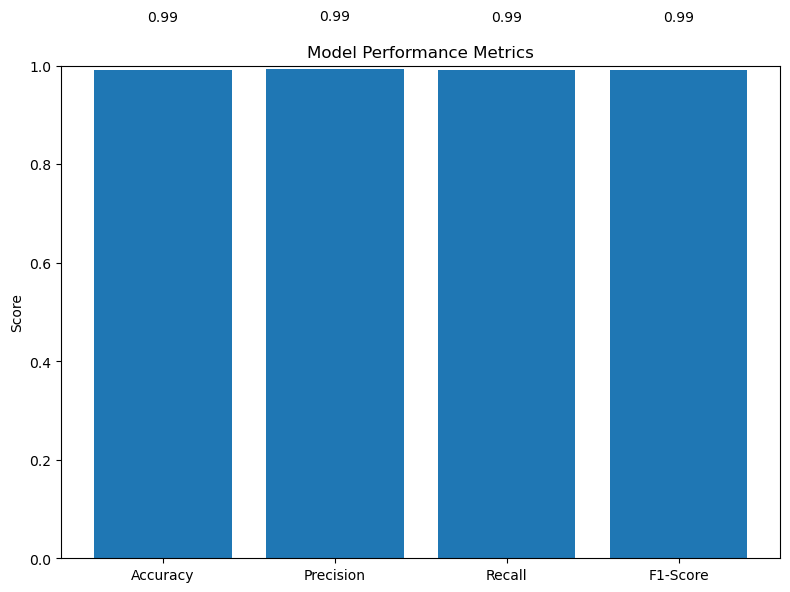

In [33]:
#showing the result of precision_score, recall_score, f1_score, accuracy_score in Bar Chart Form
plt.figure(figsize=(8, 6))
plt.bar(scores.keys(), scores.values())
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming all scores are between 0 and 1

for i, v in enumerate(scores.values()):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

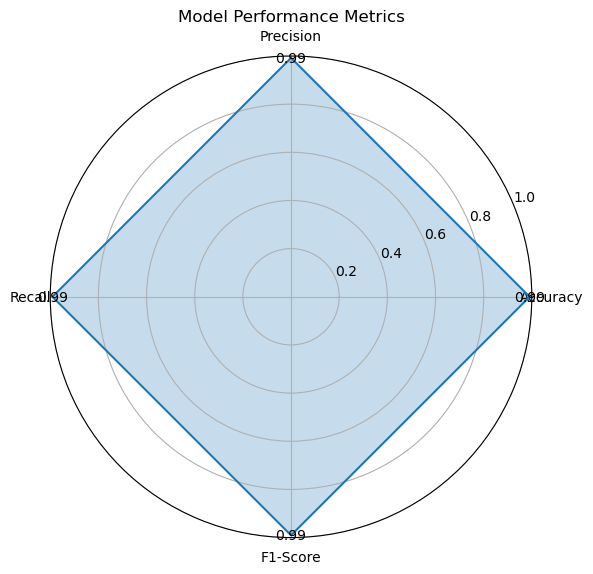

In [37]:
# In Radar chart Form
labels = list(scores.keys())
stats = list(scores.values())

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats, [stats[0]]))  # Repeat the first value to close the polygon
angles = np.concatenate((angles, [angles[0]]))  # Repeat the first angle to close the polygon

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))
ax.plot(angles, stats)
ax.fill(angles, stats, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_title('Model Performance Metrics')

for angle, stat in zip(angles[:-1], stats[:-1]):
    ax.text(angle, stat, f'{stat:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

In [39]:
from sklearn.metrics import classification_report

print("\nDetailed Classification Report:")
print(classification_report(y_test, predictions))


Detailed Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00     

In [41]:
# Get feature importances
importances = rf_classifier.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print top 10 most important features
print(feature_importances.head(10))

       feature  importance
6     RAINFALL    0.237409
4     HUMIDITY    0.206679
2   POTASSIUMM    0.168173
1   PHOSPHORUS    0.159859
0     NITROGEN    0.098293
3  TEMPERATURE    0.075658
5     pH level    0.053930


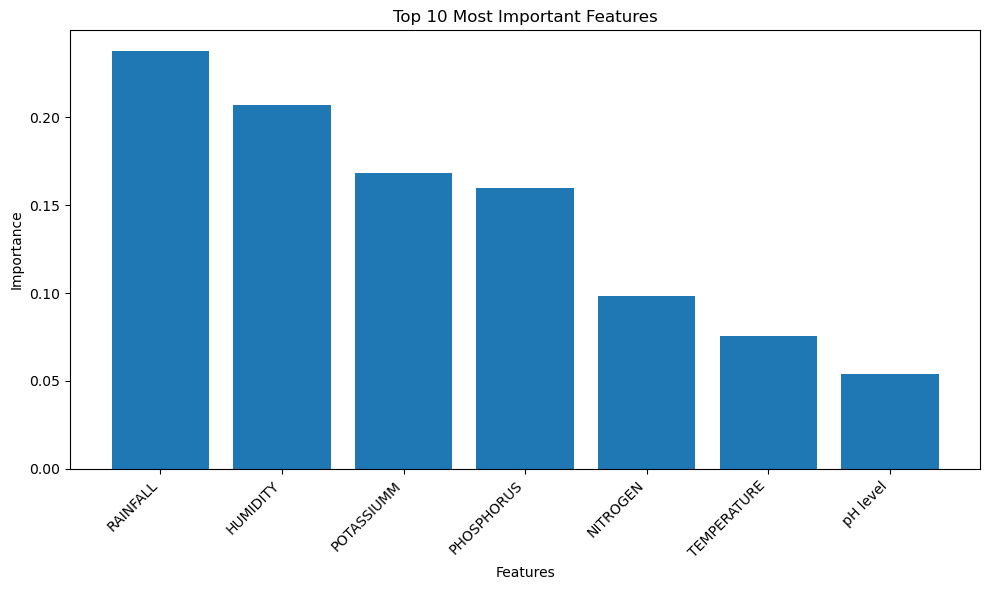

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'][:10], feature_importances['importance'][:10])
plt.title('Top 10 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

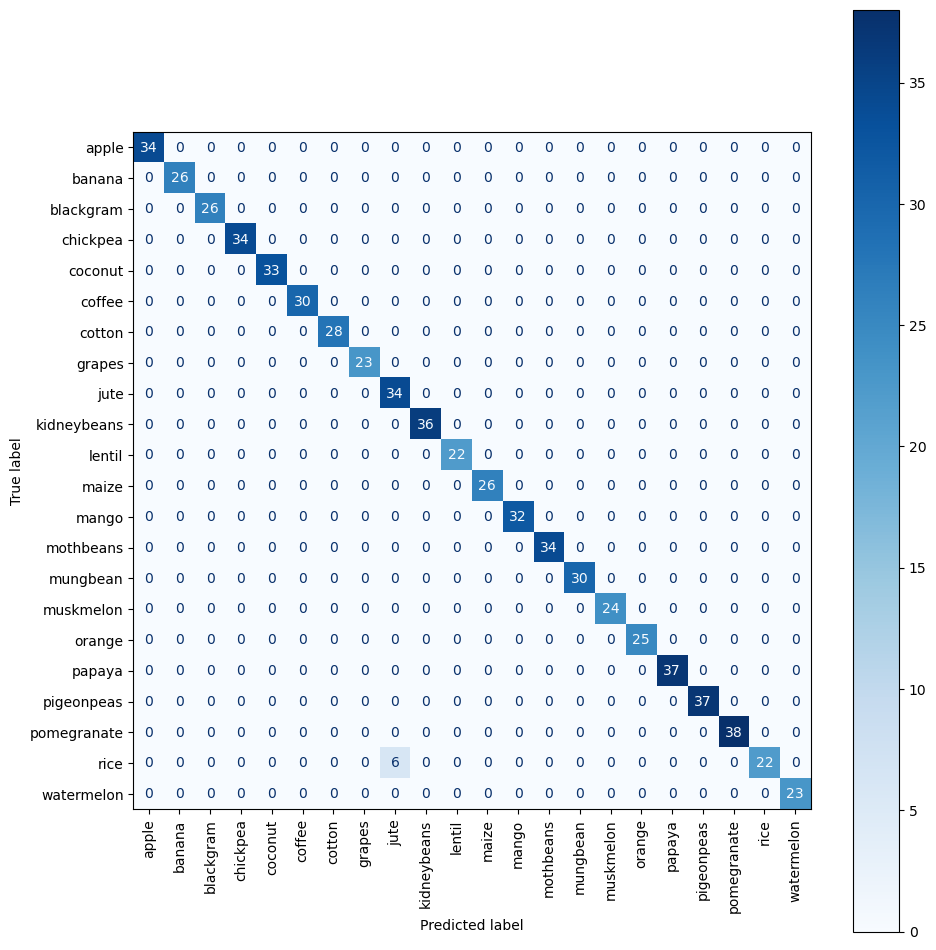

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9833


In [49]:
import joblib

joblib.dump(rf_classifier, 'SMART_FARMING_IOT.joblib')

['SMART_FARMING_IOT.joblib']